In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path

try:
    from google.colab import drive
    drive.mount('/content/drive')
    workding_dir = "/content/drive/MyDrive/logical-reasoning/"
except ModuleNotFoundError:
    workding_dir = str(Path.cwd().parent)

In [3]:
import os
import sys

os.chdir(workding_dir)
sys.path.append(workding_dir)
print("workding dir:", workding_dir)

workding dir: /Users/inflaton/Library/CloudStorage/GoogleDrive-dh.huang.2023@smu.edu.sg/My Drive/logical-reasoning


In [4]:
from dotenv import find_dotenv, load_dotenv

found_dotenv = find_dotenv(".env")

if len(found_dotenv) == 0:
    found_dotenv = find_dotenv(".env.example")
print(f"loading env vars from: {found_dotenv}")
load_dotenv(found_dotenv, override=True)

loading env vars from: /Users/inflaton/Library/CloudStorage/GoogleDrive-dh.huang.2023@smu.edu.sg/My Drive/logical-reasoning/.env


True

In [11]:
import re


def clean_up(df, model_name):
    df[model_name] = df[model_name].apply(
        lambda x: re.sub(r"回答.*是", "是", x)
        .replace("是男孩", "是")
        .replace("。", "")
        .strip()
    )
    return df

In [12]:
import pandas as pd

df = pd.read_csv("results/mgtv-results_nv4080_r2.csv")
df = clean_up(df, "internlm/internlm2_5-7b-chat-1m")
df

text label title  \
0          甄加索是自杀吗    不是  海岸之谜   
1      甄加索有身体上的疾病吗     是  海岸之谜   
2            画作是甄的     是  海岸之谜   
3           甄有心脏病吗     是  海岸之谜   
4         车轮是凶手留下的    不是  海岸之谜   
...            ...   ...   ...   
2995   哭泣者必须在晚上祭奠吗     是  甄庄哭声   
2996        尸体在湖里吗    不是  甄庄哭声   
2997  哭泣者和死者有特殊关系吗     是  甄庄哭声   
2998    是帽子的主人去世了吗    不是  甄庄哭声   
2999        死者受伤了吗    不是  甄庄哭声   

                                                 puzzle  \
0     在远离城市喧嚣的海边小屋，一天清晨，邻居发现甄加索僵卧在沙滩上，已无生命迹象。现场没有发现任...   
1     在远离城市喧嚣的海边小屋，一天清晨，邻居发现甄加索僵卧在沙滩上，已无生命迹象。现场没有发现任...   
2     在远离城市喧嚣的海边小屋，一天清晨，邻居发现甄加索僵卧在沙滩上，已无生命迹象。现场没有发现任...   
3     在远离城市喧嚣的海边小屋，一天清晨，邻居发现甄加索僵卧在沙滩上，已无生命迹象。现场没有发现任...   
4     在远离城市喧嚣的海边小屋，一天清晨，邻居发现甄加索僵卧在沙滩上，已无生命迹象。现场没有发现任...   
...                                                 ...   
2995  在一个安静的夜晚，小村庄的湖边突然传来了阵阵哭泣声。第二天早晨，村长甄锐发现湖边的石头上放着...   
2996  在一个安静的夜晚，小村庄的湖边突然传来了阵阵哭泣声。第二天早晨，村长甄锐发现湖边的石头上放着...   
2997  在一个安静的夜晚，小村庄的湖边突然传来了阵阵哭泣声。第二天早晨，村长甄锐发现湖边的石头上放着...   
2998  在一个安静的夜晚，小村庄的湖边突然传来了阵阵哭泣声。第二天早晨，村长甄锐发现湖边的石头上放着...   
2999  在一个安静的夜晚，小村庄的湖边突然传来了阵阵哭泣声。第二天早晨，村长甄锐发现湖边的石头上放着...   

                                                  truth  \
0     甄加索是一位热爱自然的画家，他每年都会来到这个海边小屋寻找灵感。在他生命的最后几天，他一直在...   
1     甄加索是一位热爱自然的画家，他每年都会来到这个海边小屋寻找灵感。在他生命的最后几天，他一直在...   
2     甄加索是一位热爱自然的画家，他每年都会来到这个海边小屋寻找灵感。在他生命的最后几天，他一直在...   
3     甄加索是一位热爱自然的画家，他每年都会来到这个海边小屋寻找灵感。在他生命的最后几天，他一直在...   
4     甄加索是一位热爱自然的画家，他每年都会来到这个海边小屋寻找灵感。在他生命的最后几天，他一直在...   
...                                                 ...   
2995  原来，这顶破旧的帽子属于一个小男孩，他小时候与爷爷在湖边生活。爷爷教他钓鱼、游泳，还告诉他湖...   
2996  原来，这顶破旧的帽子属于一个小男孩，他小时候与爷爷在湖边生活。爷爷教他钓鱼、游泳，还告诉他湖...   
2997  原来，这顶破旧的帽子属于一个小男孩，他小时候与爷爷在湖边生活。爷爷教他钓鱼、游泳，还告诉他湖...   
2998  原来，这顶破旧的帽子属于一个小男孩，他小时候与爷爷在湖边生活。爷爷教他钓鱼、游泳，还告诉他湖...   
2999  原来，这顶破旧的帽子属于一个小男孩，他小时候与爷爷在湖边生活。爷爷教他钓鱼、游泳，还告诉他湖...   

     internlm/internlm2_5-7b-chat-1m  \
0                                 不是   
1                                  是   
2                                 不是   
3                                  是   
4                                 不是   
...                              ...   
2995                              不是   
2996                              不是   
2997                               是   
2998                               是   
2999                              不是   

     internlm/internlm2_5-7b-chat-1m_checkpoint-562  \
0                                                不是   
1                                                 是   
2                                                 是   
3                                                 是   
4                                               不重要   
...                                             ...   
2995                                            不重要   
2996                                            不重要   
2997                                              是   
2998                                              是   
2999                                            不重要   

     internlm/internlm2_5-7b-chat-1m_checkpoint-1124  \
0                                                 不是   
1                                                  是   
2                                                  是   
3                                                  是   
4                                                 不是   
...                                              ...   
2995                                             不重要   
2996                                             不重要   
2997                                               是   
2998                                               是   
2999                                             不重要   

     internlm/internlm2_5-7b-chat-1m_checkpoint-1686  \
0                                                 不是   
1                                                  是   
2                                                  是   
3                                                  是   
4                                                 不是   
...                                 

In [6]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

def plot_value_counts(df, column):
    font_family = rcParams["font.family"]
    # Set the font to SimHei to support Chinese characters
    rcParams["font.family"] = "STHeiti"
    rcParams["axes.unicode_minus"] = False  # This is to support the minus sign in Chinese.

    plt.figure(figsize=(12, 6))
    df[column].value_counts().plot(kind="bar")
    # add values on top of bars
    for i, v in enumerate(df[column].value_counts()):
        plt.text(i, v + 0.1, str(v), ha="center")
    plt.show()
    
    rcParams["font.family"] = font_family


In [7]:
df.columns.to_list()

['text',
 'label',
 'title',
 'puzzle',
 'truth',
 'internlm/internlm2_5-7b-chat-1m',
 'internlm/internlm2_5-7b-chat-1m_checkpoint-562',
 'internlm/internlm2_5-7b-chat-1m_checkpoint-1124',
 'internlm/internlm2_5-7b-chat-1m_checkpoint-1686',
 'internlm/internlm2_5-7b-chat-1m_checkpoint-2248',
 'internlm/internlm2_5-7b-chat-1m_checkpoint-2810',
 'internlm/internlm2_5-7b-chat-1m_checkpoint-3372']

********** internlm/internlm2_5-7b-chat-1m **********
internlm/internlm2_5-7b-chat-1m
不是     1670
是      1284
不重要      46
Name: count, dtype: int64


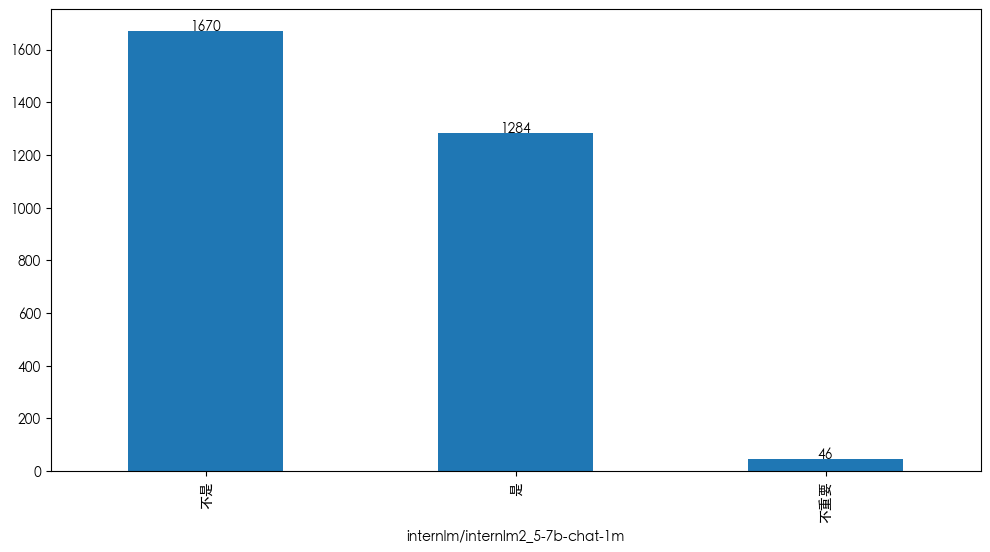

********** internlm/internlm2_5-7b-chat-1m_checkpoint-562 **********
internlm/internlm2_5-7b-chat-1m_checkpoint-562
不重要     1828
是        875
不是       257
回答正确      28
问法错误      12
Name: count, dtype: int64


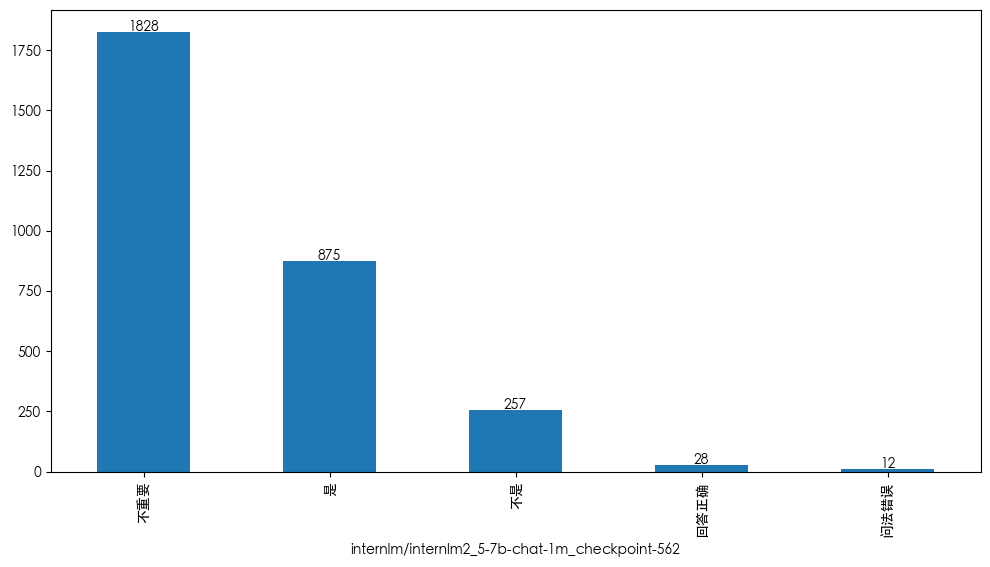

********** internlm/internlm2_5-7b-chat-1m_checkpoint-1124 **********
internlm/internlm2_5-7b-chat-1m_checkpoint-1124
是       1069
不是       966
不重要      946
回答正确      10
问法错误       9
Name: count, dtype: int64


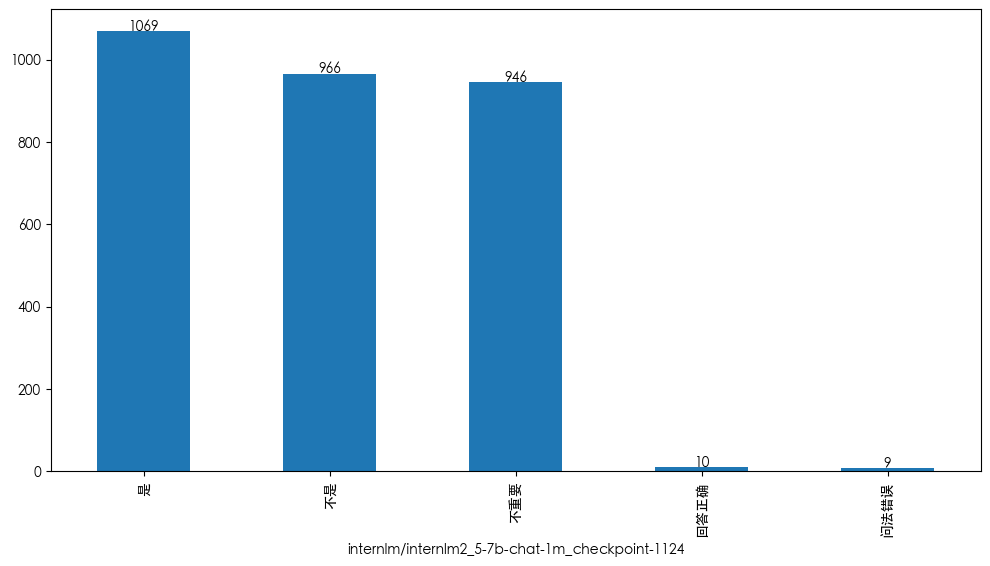

********** internlm/internlm2_5-7b-chat-1m_checkpoint-1686 **********
internlm/internlm2_5-7b-chat-1m_checkpoint-1686
不是      1581
是        999
不重要      383
回答正确      24
问法错误      13
Name: count, dtype: int64


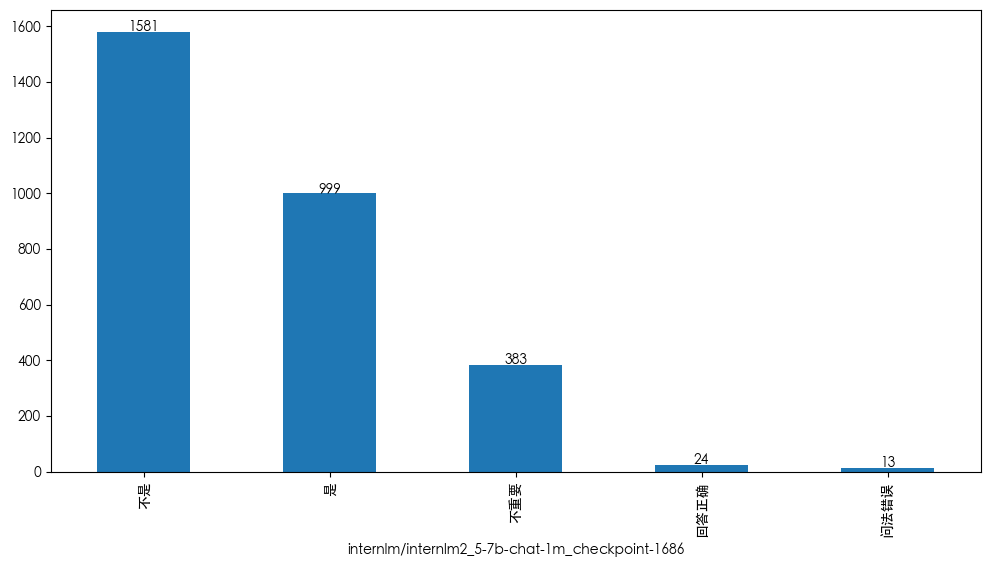

********** internlm/internlm2_5-7b-chat-1m_checkpoint-2248 **********
internlm/internlm2_5-7b-chat-1m_checkpoint-2248
不是      1490
是        878
不重要      563
问法错误      45
回答正确      24
Name: count, dtype: int64


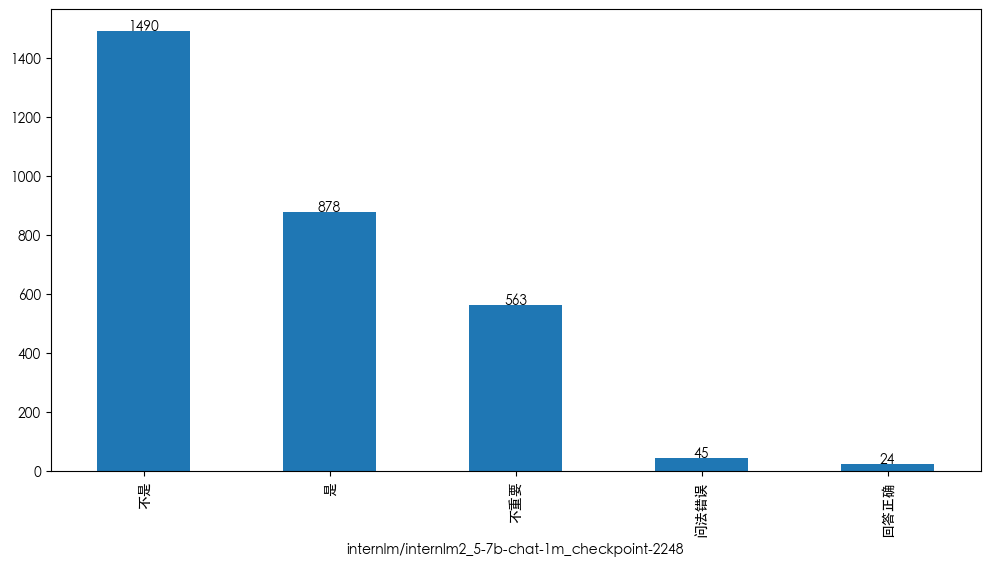

********** internlm/internlm2_5-7b-chat-1m_checkpoint-2810 **********
internlm/internlm2_5-7b-chat-1m_checkpoint-2810
不是      1342
是       1060
不重要      544
回答正确      31
问法错误      23
Name: count, dtype: int64


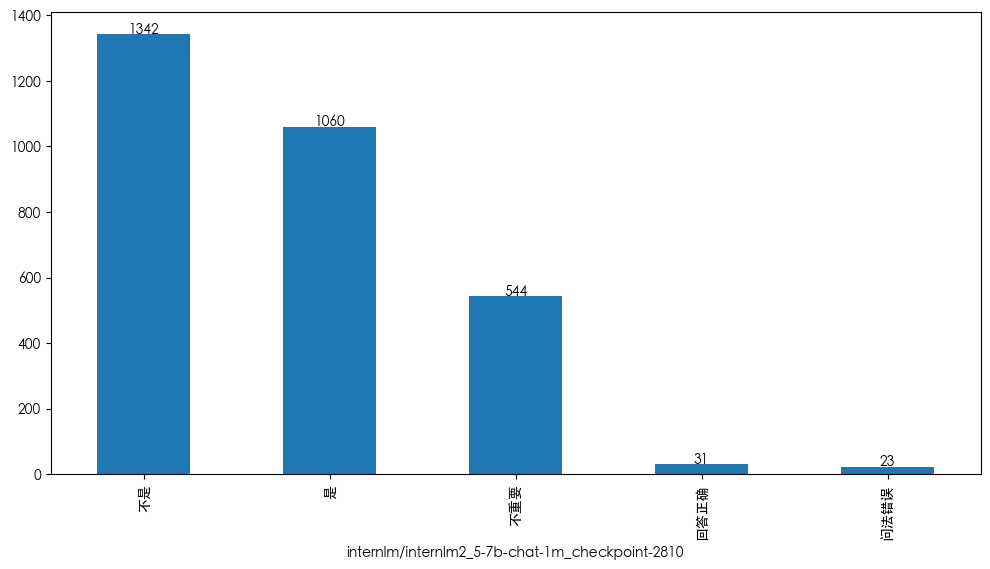

********** internlm/internlm2_5-7b-chat-1m_checkpoint-3372 **********
internlm/internlm2_5-7b-chat-1m_checkpoint-3372
不是      1338
是       1006
不重要      598
回答正确      30
问法错误      28
Name: count, dtype: int64


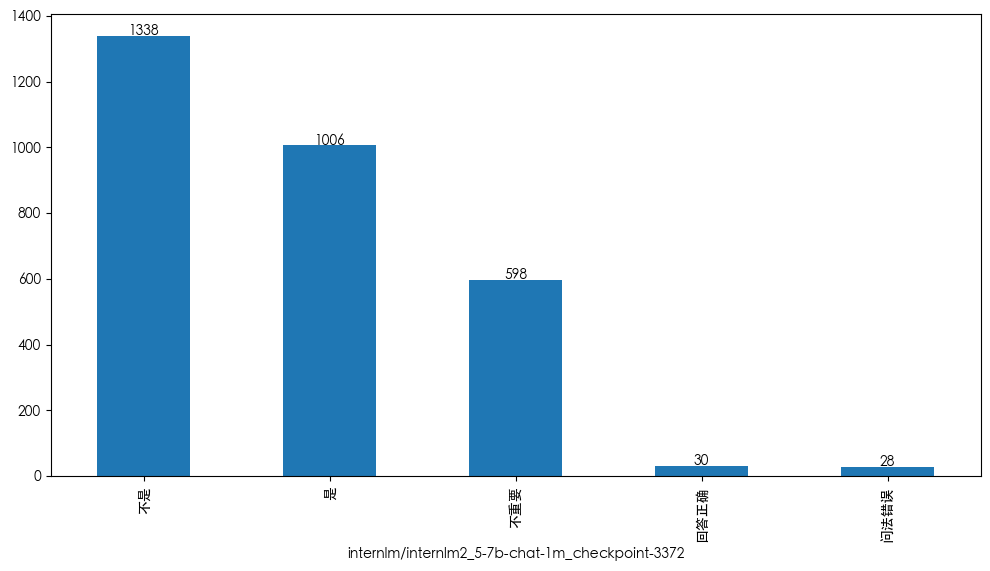

In [13]:
for col in df.columns[5:]:
    print("*" * 10, col, "*" * 10)
    print(df[col].value_counts())
    plot_value_counts(df, col)

In [15]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


def calc_metrics_for_col(df, col):
    y_true = df["label"]
    y_pred = df[col]

    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average="weighted", labels=np.unique(y_pred))
    recall = recall_score(y_true, y_pred, average="weighted", labels=np.unique(y_pred))
    f1 = f1_score(y_true, y_pred, average="weighted", labels=np.unique(y_pred))

    return accuracy, float(precision), float(recall), float(f1)

In [19]:
import pandas as pd

perf_df = pd.DataFrame(columns=["epoch", "model", "accuracy", "precision", "recall", "f1"])
for i, col in enumerate(df.columns[5:]):
    accuracy, precision, recall, f1 = calc_metrics_for_col(df, col)
    new_model_metrics = {"epoch": i, "model": col, "accuracy": accuracy, "precision": precision, "recall": recall, "f1": f1}

    # Convert the dictionary to a DataFrame and concatenate it with the existing DataFrame
    perf_df = pd.concat([perf_df, pd.DataFrame([new_model_metrics])], ignore_index=True)

perf_df

/var/folders/7x/56svhln929zdh2xhr3mwqg4r0000gn/T/ipykernel_34085/961288552.py:9: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  perf_df = pd.concat([perf_df, pd.DataFrame([new_model_metrics])], ignore_index=True)


epoch                                            model  accuracy  precision  \
0     0                  internlm/internlm2_5-7b-chat-1m  0.759667   0.741854   
1     1   internlm/internlm2_5-7b-chat-1m_checkpoint-562  0.392000   0.865731   
2     2  internlm/internlm2_5-7b-chat-1m_checkpoint-1124  0.611000   0.807798   
3     3  internlm/internlm2_5-7b-chat-1m_checkpoint-1686  0.713667   0.761735   
4     4  internlm/internlm2_5-7b-chat-1m_checkpoint-2248  0.653000   0.749475   
5     5  internlm/internlm2_5-7b-chat-1m_checkpoint-2810  0.684667   0.769066   
6     6  internlm/internlm2_5-7b-chat-1m_checkpoint-3372  0.668333   0.767219   

     recall        f1  
0  0.781014  0.758887  
1  0.392000  0.459125  
2  0.611000  0.674668  
3  0.713667  0.728502  
4  0.653000  0.685228  
5  0.684667  0.716450  
6  0.668333  0.705321

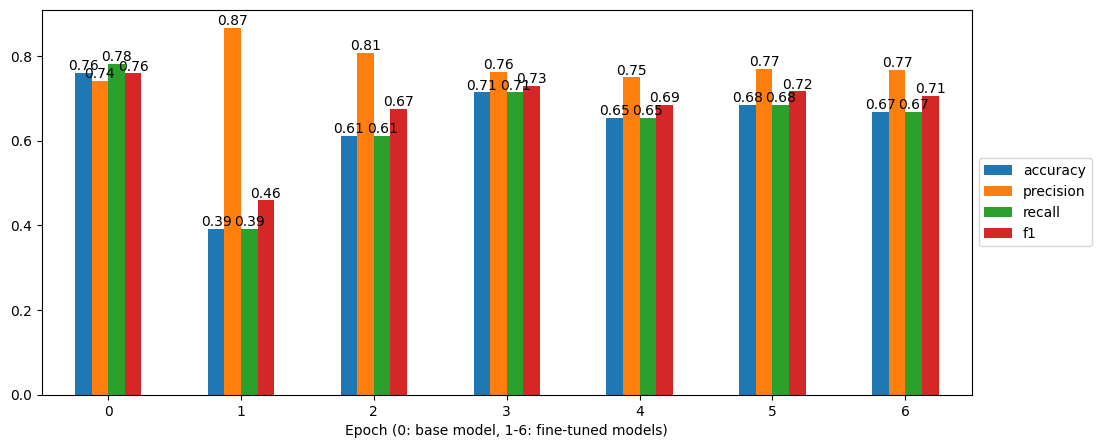

In [24]:
# plot metrics for each model
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(12, 5))

perf_df.plot(x="epoch", y=["accuracy", "precision", "recall", "f1"], kind="bar", ax=ax)

# add values on top of bars
for p in ax.patches:
    ax.annotate(
        f"{p.get_height():.2f}",
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha="center",
        va="bottom",
        fontsize=10,
    )

# add title and labels
# ax.set_title("Metrics for different settings")
# ax.set_ylabel("Value")
ax.set_xlabel("Epoch (0: base model, 1-6: fine-tuned models)")
# rotate x labels
plt.xticks(rotation=0)

# set legend at the right to avoid overlapping with bars
plt.legend(loc="center left", bbox_to_anchor=(1.0, 0.5))
# plt.tight_layout()

plt.show()